# Maths Project

In [ ]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("viridis")

In [ ]:
library(dplyr)
library(ggplot2)

In [ ]:
install.packages("DataExplorer")

In [ ]:
install.packages("sf")

In [ ]:
library(dplyr)
library(ggplot2)
library(viridis)

In [ ]:
library(sf)

In [9]:
library(DataExplorer)

In [10]:
system("apt-get -y update")
system("apt-get install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev")
install.packages("sf")
library("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Preprocessing Data

In [11]:
df <- read.csv("Missing Cases Complied (2017-2021).csv")

In [12]:
head(df)

,S..No,Year,Category,State.UT,Unrecovered.Untraced.Persons.from.Previous.years...Male,Unrecovered.Untraced.Persons.from.Previous.years...Female,Unrecovered.Untraced.Persons.from.Previous.years...Trans,Unrecovered.Untraced.Persons.from.Previous.years...Total,Persons.Missing.this.year...Male,Persons.Missing.this.year...Female,⋯,Total.Recovered.Traced.this.year...Trans,Total.Recovered.Traced.this.year...Total,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Male,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Female,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Trans,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Male,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Female,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,2017,State,Andhra Pradesh,4173,2990,5,7168,3114,5225,⋯,7,10177,51.4,78.2,58.3,65.6,3540,1792,5,5337
2,2,2017,State,Arunachal Pradesh,2,93,0,95,9,90,⋯,0,103,63.6,52.5,NA,53.1,4,87,0,91
3,3,2017,State,Assam,530,1223,0,1753,997,2302,⋯,0,3329,66.5,65.6,NA,65.9,512,1211,0,1723
4,4,2017,State,Bihar,1523,2935,86,4544,1932,6020,⋯,104,4710,30.2,39.8,44.8,37.3,2410,5394,128,7932
5,5,2017,State,Chhattisgarh,4366,5836,0,10202,3449,7383,⋯,0,9446,37.7,49.2,NA,44.9,4870,6718,0,11588
6,6,2017,State,Goa,475,230,0,705,304,274,⋯,0,515,33.5,50.4,NA,40.1,518,250,0,768


In [13]:
dim(df)  #Dimensions of Dataset

[1] 180  28

In [14]:
df[is.na(df)]=0  # Assigning missing values 0 value

In [15]:
View(summary(df))

     S..No             Year        Category           State.UT        
 Min.   :  1.00   Min.   :2017   Length:180         Length:180        
 1st Qu.: 45.75   1st Qu.:2018   Class :character   Class :character  
 Median : 90.50   Median :2019   Mode  :character   Mode  :character  
 Mean   : 90.50   Mean   :2019                                        
 3rd Qu.:135.25   3rd Qu.:2020                                        
 Max.   :180.00   Max.   :2021                                        
 Unrecovered.Untraced.Persons.from.Previous.years...Male
 Min.   :    0                                          
 1st Qu.:   56                                          
 Median : 1258                                          
 Mean   : 3893                                          
 3rd Qu.: 5185                                          
 Max.   :28778                                          
 Unrecovered.Untraced.Persons.from.Previous.years...Female
 Min.   :    0.00                            

In [16]:
str(df)

'data.frame':	180 obs. of  28 variables:
 $ S..No                                                                                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Year                                                                                      : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Category                                                                                  : chr  "State" "State" "State" "State" ...
 $ State.UT                                                                                  : chr  "Andhra Pradesh" "Arunachal Pradesh" "Assam" "Bihar" ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Male                                   : int  4173 2 530 1523 4366 475 4174 4229 785 1935 ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Female                                 : int  2990 93 1223 2935 5836 230 4240 3641 506 1360 ...
 $ Unrecovered.Untraced.Persons.from.Previous.years...Trans                              

In [17]:
head(df)

,S..No,Year,Category,State.UT,Unrecovered.Untraced.Persons.from.Previous.years...Male,Unrecovered.Untraced.Persons.from.Previous.years...Female,Unrecovered.Untraced.Persons.from.Previous.years...Trans,Unrecovered.Untraced.Persons.from.Previous.years...Total,Persons.Missing.this.year...Male,Persons.Missing.this.year...Female,⋯,Total.Recovered.Traced.this.year...Trans,Total.Recovered.Traced.this.year...Total,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Male,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Female,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Trans,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Male,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Female,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,2017,State,Andhra Pradesh,4173,2990,5,7168,3114,5225,⋯,7,10177,51.4,78.2,58.3,65.6,3540,1792,5,5337
2,2,2017,State,Arunachal Pradesh,2,93,0,95,9,90,⋯,0,103,63.6,52.5,0.0,53.1,4,87,0,91
3,3,2017,State,Assam,530,1223,0,1753,997,2302,⋯,0,3329,66.5,65.6,0.0,65.9,512,1211,0,1723
4,4,2017,State,Bihar,1523,2935,86,4544,1932,6020,⋯,104,4710,30.2,39.8,44.8,37.3,2410,5394,128,7932
5,5,2017,State,Chhattisgarh,4366,5836,0,10202,3449,7383,⋯,0,9446,37.7,49.2,0.0,44.9,4870,6718,0,11588
6,6,2017,State,Goa,475,230,0,705,304,274,⋯,0,515,33.5,50.4,0.0,40.1,518,250,0,768


In [18]:
DataExplorer::create_report(df)  #Creating Report using DataExplorer



processing file: report.rmd



output file: /content/report.knit.md




/usr/bin/pandoc +RTS -K512m -RTS /content/report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/report.html --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpHPnX5E/rmarkdown-strf458d39c61.html 



Output created: report.html



# Questions

## Q1 In which year and in which state were total maximum missing cases (male,female and trans)? 

### Year wise

In [19]:
gender_missing <- subset(df,select=c("Persons.Missing.this.year...Female","Persons.Missing.this.year...Male","Persons.Missing.this.year...Trans","Year"))
gender_missing

,Persons.Missing.this.year...Female,Persons.Missing.this.year...Male,Persons.Missing.this.year...Trans,Year
,<int>,<int>,<int>,<int>
1,5225,3114,7,2017
2,90,9,0,2017
3,2302,997,0,2017
4,6020,1932,146,2017
5,7383,3449,0,2017
6,274,304,0,2017
7,7712,4509,1,2017
8,4780,3334,0,2017
9,852,512,0,2017


In [20]:
df_grp_year = gender_missing %>% group_by(Year)  %>%
                    summarise(total_missing_female = sum(Persons.Missing.this.year...Female),
                              total_missing_male = sum(Persons.Missing.this.year...Male),
                              total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')
df_grp_year

Year,total_missing_female,total_missing_male,total_missing_trans
<int>,<int>,<int>,<int>
2017,188382,116467,418
2018,223621,123339,564
2019,248397,132089,40
2020,222395,100748,27
2021,265481,124177,186


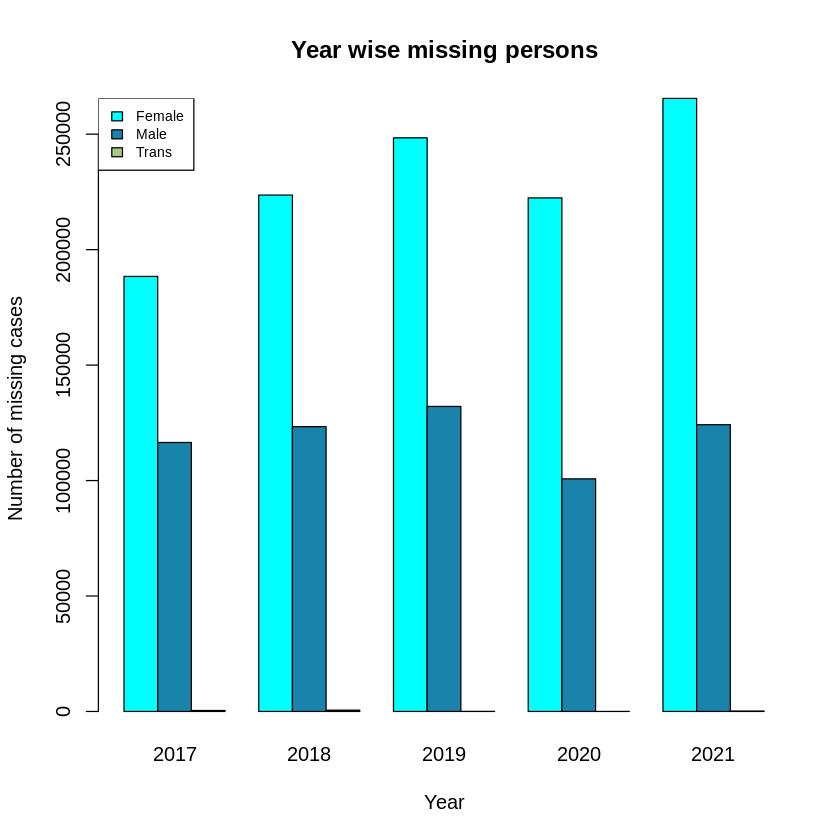

In [21]:
colors = c("#00FFFF", "#1983AB", "#ABC782")
year <- c("2017", "2018", "2019", "2020", "2021")
gender <- c("Female", "Male", "Trans")
  
mx <- t(as.matrix(df_grp_year[-1]))
colnames(mx) <- df_grp_year$Year


# Create the bar chart
barplot(mx,main = "Year wise missing persons", names.arg = year, 
                          xlab = "Year", ylab = "Number of missing cases", 
                          col = colors, beside = TRUE)  
                            #geom_text(aes(label = signif(value)), nudge_y = 3)

# Add the legend to the chart
legend("topleft", gender, cex = 0.7, fill = colors)


### State-wise

In [22]:
state_missing <- subset(df,select=c("Persons.Missing.this.year...Female","Persons.Missing.this.year...Male","Persons.Missing.this.year...Trans","State.UT"))
state_missing

,Persons.Missing.this.year...Female,Persons.Missing.this.year...Male,Persons.Missing.this.year...Trans,State.UT
,<int>,<int>,<int>,<chr>
1,5225,3114,7,Andhra Pradesh
2,90,9,0,Arunachal Pradesh
3,2302,997,0,Assam
4,6020,1932,146,Bihar
5,7383,3449,0,Chhattisgarh
6,274,304,0,Goa
7,7712,4509,1,Gujarat
8,4780,3334,0,Haryana
9,852,512,0,Himachal Pradesh


In [23]:
df_grp_state = state_missing %>% group_by(State.UT)  %>%
                    summarise(total_missing_female = sum(Persons.Missing.this.year...Female),
                              total_missing_male = sum(Persons.Missing.this.year...Male),
                              total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')
df_grp_state

State.UT,total_missing_female,total_missing_male,total_missing_trans
<chr>,<int>,<int>,<int>
A & N Islands,353,331,0
Andhra Pradesh,35574,17277,514
Arunachal Pradesh,156,88,0
Assam,15611,7164,20
Bihar,34679,9124,221
Chandigarh,2135,1450,1
Chhattisgarh,49125,18184,0
D&N Haveli,121,50,0
D&N Haveli and Daman and Diu,151,95,0


In [24]:
new_row <- c("D&N Haveli and Daman and Diu",480,296,0)

In [25]:
df_grp_state <-df_grp_state[-c(8,9,10),]

In [26]:
df_grp_state[nrow(df_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",480,296,0)

In [27]:
class(df_grp_state$total_missing_female)="int"
class(df_grp_state$total_missing_male)="int"
class(df_grp_state$total_missing_trans)="int"
class(df_grp_state$State.UT)="int"
df_grp_state

State.UT,total_missing_female,total_missing_male,total_missing_trans
<int>,<int>,<int>,<int>
A & N Islands,353,331,0
Andhra Pradesh,35574,17277,514
Arunachal Pradesh,156,88,0
Assam,15611,7164,20
Bihar,34679,9124,221
Chandigarh,2135,1450,1
Chhattisgarh,49125,18184,0
Delhi UT,62734,48087,3
Goa,1220,1437,0


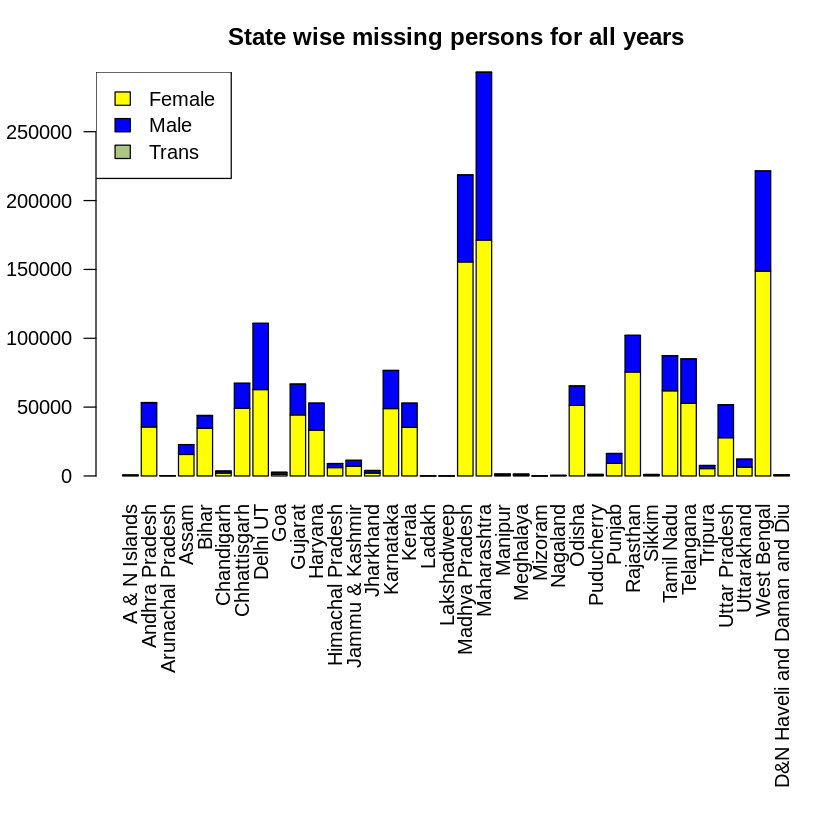

In [28]:
colors = c("yellow", "blue", "#ABC782")
gender <- c("Female", "Male", "Trans")
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")


mx <- t(as.matrix(df_grp_state[-1]))
colnames(mx) <- df_grp_state$State.UT

# Create the bar chart
par(mar=c(15, 4,3,1)) # 15 line height for bottom margin
#dev.new(width=500,height=500,unit="px")
barplot(mx, main = "State wise missing persons for all years", names.arg=state, 
                          col = colors,las=2)   #geom_bar(width = 0.98)
                            #geom_text(aes(label = signif(value)), nudge_y = 3)

# Add the legend to the chart
legend("topleft", gender, fill = colors)



## Q2 ST/UT wise total recovered cases yearly based

### Year wise

In [29]:
gender_recovered <- subset(df,select=c("Total.Recovered.Traced.this.year...Female","Total.Recovered.Traced.this.year...Male","Total.Recovered.Traced.this.year...Trans","Year"))
gender_recovered

,Total.Recovered.Traced.this.year...Female,Total.Recovered.Traced.this.year...Male,Total.Recovered.Traced.this.year...Trans,Year
,<int>,<int>,<int>,<int>
1,6423,3747,7,2017
2,96,7,0,2017
3,2314,1015,0,2017
4,3561,1045,104,2017
5,6501,2945,0,2017
6,254,261,0,2017
7,8481,5291,1,2017
8,5003,3555,0,2017
9,881,648,0,2017


In [30]:
rec_grp_year = gender_recovered %>% group_by(Year)  %>%
                    summarise(total_recovered_female = sum(Total.Recovered.Traced.this.year...Female),
                              total_recovered_male = sum(Total.Recovered.Traced.this.year...Male),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              .groups = 'drop')
rec_grp_year

Year,total_recovered_female,total_recovered_male,total_recovered_trans
<int>,<int>,<int>,<int>
2017,200357,120435,346
2018,209852,122384,518
2019,222949,125558,101
2020,224043,108298,142
2021,261278,123716,130


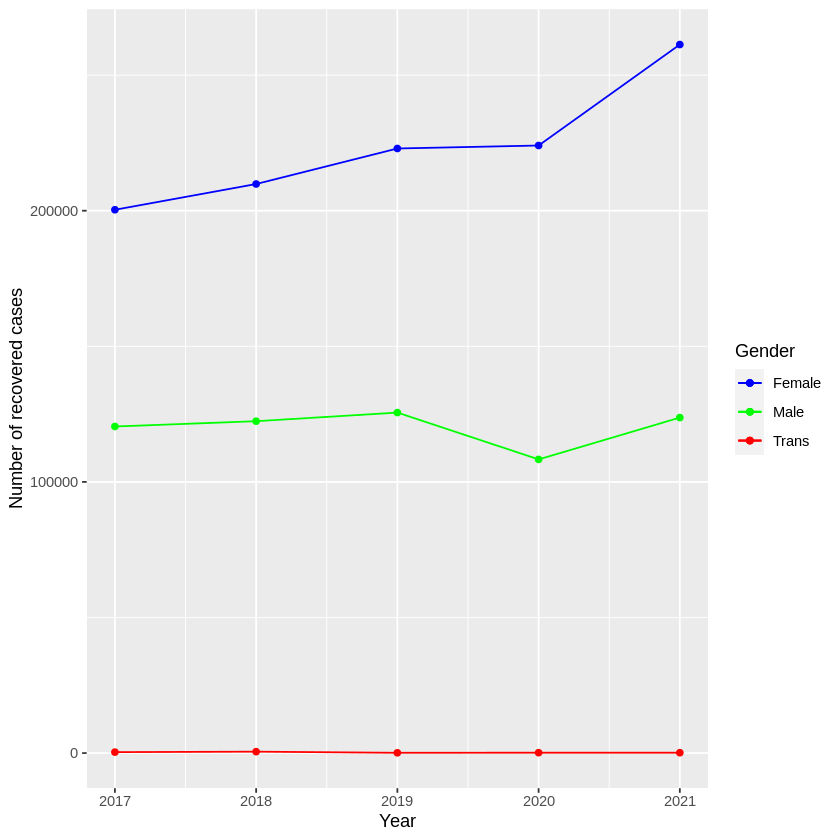

In [31]:
p<-ggplot(rec_grp_year, aes(x=Year)) +
  geom_line(aes(y=total_recovered_female,color="blue"))+
  geom_point(aes(y=total_recovered_female,color="blue")) +
  geom_line(aes(y=total_recovered_male,color="green")) +
  geom_point(aes(y=total_recovered_male,color="green")) +
  geom_line(aes(y=total_recovered_trans,color="red")) +
  geom_point(aes(y=total_recovered_trans,color="red")) +
  labs(x="Year",y="Number of recovered cases") +
  scale_y_continuous(labels = function(x) format(x, scientific=FALSE)) +
  scale_color_manual(labels = c("Female", "Male","Trans"), values = c("blue","green","red"),name="Gender")
  #scale_fill_discrete(labels=c('Female','Male','Trans'))
p

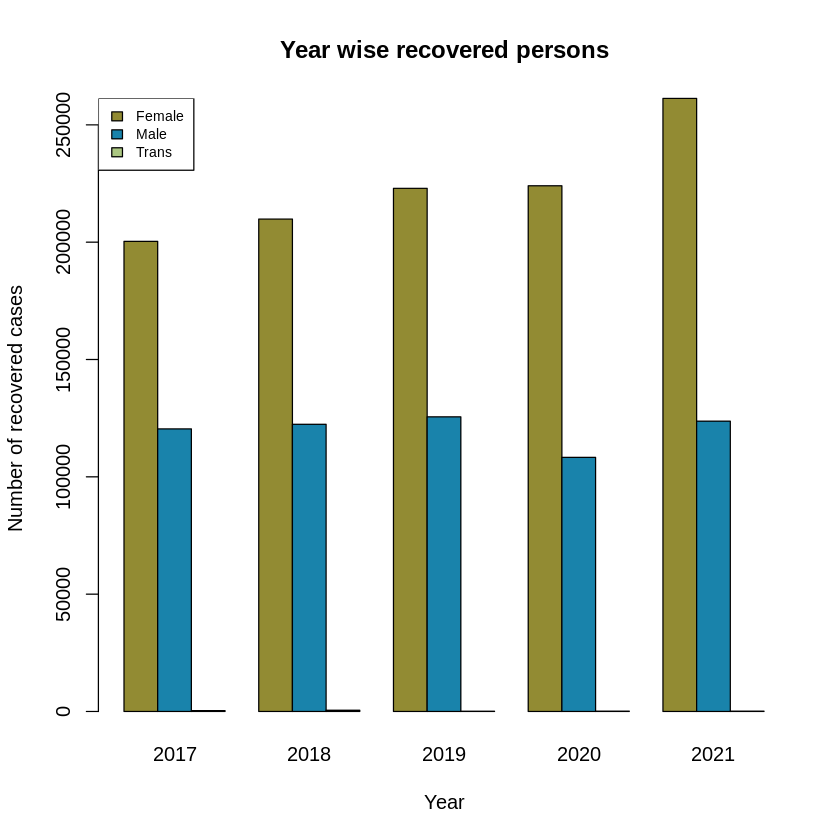

In [32]:
colors = c("#928B33", "#1983AB", "#ABC782")
year <- c("2017", "2018", "2019", "2020", "2021")
gender <- c("Female", "Male", "Trans")
  
mx <- t(as.matrix(rec_grp_year[-1]))
colnames(mx) <- rec_grp_year$Year


# Create the bar chart
barplot(mx, main = "Year wise recovered persons", names.arg = year, 
                          xlab = "Year", ylab = "Number of recovered cases", 
                          col = colors, beside = TRUE)  
                            #geom_text(aes(label = signif(value)), nudge_y = 3)

# Add the legend to the chart
legend("topleft", gender, cex = 0.7, fill = colors)

### State-wise

In [43]:
state_recovered <- subset(df,select=c("Total.Recovered.Traced.this.year...Female","Total.Recovered.Traced.this.year...Male","Total.Recovered.Traced.this.year...Trans","State.UT"))
state_recovered

,Total.Recovered.Traced.this.year...Female,Total.Recovered.Traced.this.year...Male,Total.Recovered.Traced.this.year...Trans,State.UT
,<int>,<int>,<int>,<chr>
1,6423,3747,7,Andhra Pradesh
2,96,7,0,Arunachal Pradesh
3,2314,1015,0,Assam
4,3561,1045,104,Bihar
5,6501,2945,0,Chhattisgarh
6,254,261,0,Goa
7,8481,5291,1,Gujarat
8,5003,3555,0,Haryana
9,881,648,0,Himachal Pradesh


In [44]:
rec_grp_state = state_recovered %>% group_by(State.UT)  %>%
                    summarise(total_recovered_female = sum(Total.Recovered.Traced.this.year...Female),
                              total_recovered_male = sum(Total.Recovered.Traced.this.year...Male),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              .groups = 'drop')
rec_grp_state

State.UT,total_recovered_female,total_recovered_male,total_recovered_trans
<chr>,<int>,<int>,<int>
A & N Islands,270,207,0
Andhra Pradesh,35859,17968,514
Arunachal Pradesh,247,56,0
Assam,15687,6912,120
Bihar,29493,8230,138
Chandigarh,1664,1147,1
Chhattisgarh,43756,16394,0
D&N Haveli,93,37,0
D&N Haveli and Daman and Diu,196,96,0


In [45]:
new_row <- c("D&N Haveli and Daman and Diu",488,282,0)

In [46]:
rec_grp_state <-rec_grp_state[-c(8,9,10),]

In [47]:
rec_grp_state[nrow(rec_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",488,282,0)

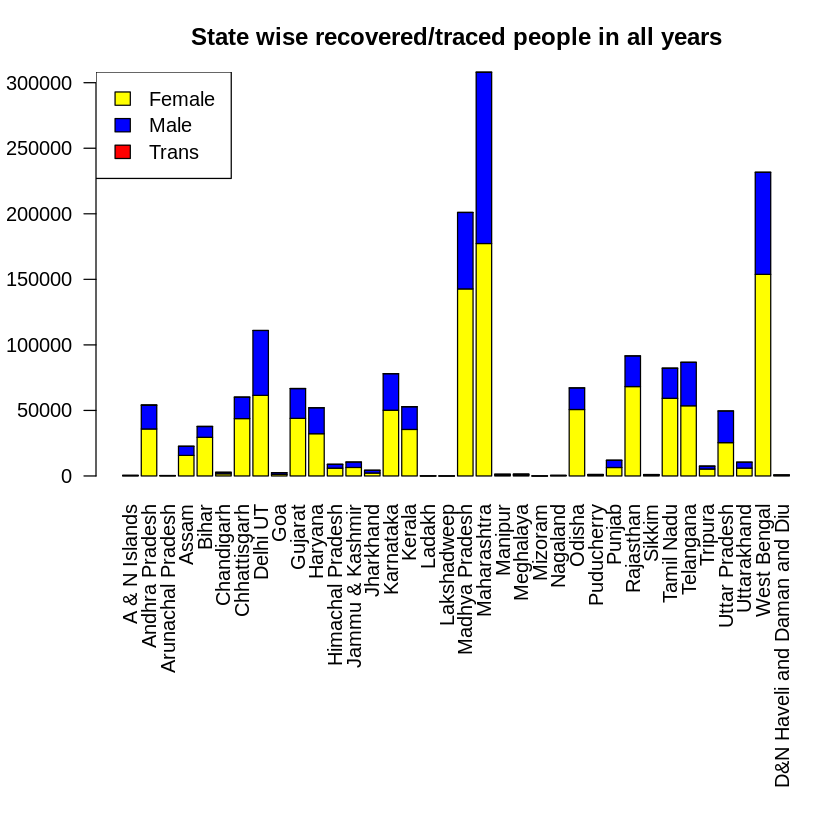

In [48]:
colors = c("yellow", "blue", "red")
gender <- c("Female", "Male", "Trans")
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")


mx <- t(as.matrix(rec_grp_state[-1]))
colnames(mx) <- rec_grp_state$State.UT

# Create the bar chart
par(mar=c(15, 4,3,1)) # 15 line height for bottom margin
#dev.new(width=500,height=500,unit="px")
barplot(mx, main = "State wise recovered/traced people in all years", names.arg=state, 
                          col = colors,las=2)   #geom_bar(width = 0.98)
                            #geom_text(aes(label = signif(value)), nudge_y = 3)

# Add the legend to the chart
legend("topleft", gender, fill = colors)



## Q3 Identify the states with recovery rate less than 60%? 

In [49]:
low_recovery <- subset(df,select=c("Year","State.UT","Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total"),Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total<60)
low_recovery
low_recovery_2021 <- subset(low_recovery,Year==2021)
low_recovery_2021

,Year,State.UT,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total
,<int>,<chr>,<dbl>
2,2017,Arunachal Pradesh,53.1
4,2017,Bihar,37.3
5,2017,Chhattisgarh,44.9
6,2017,Goa,40.1
8,2017,Haryana,53.5
9,2017,Himachal Pradesh,57.6
10,2017,Jammu & Kashmir,35.6
11,2017,Jharkhand,43.9
12,2017,Karnataka,53.2


,Year,State.UT,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total
,<int>,<chr>,<dbl>
146,2021,Arunachal Pradesh,42.1
148,2021,Bihar,43.9
149,2021,Chhattisgarh,42.9
150,2021,Goa,35.4
152,2021,Haryana,57.8
154,2021,Jammu & Kashmir,38.9
155,2021,Jharkhand,46.3
158,2021,Madhya Pradesh,50.0
162,2021,Mizoram,0.0


In [50]:
colnames(low_recovery_2021)[2] <- "Name"

In [51]:
low_recovery_2021$Name[low_recovery_2021$Name== "A & N Islands"] <- "Andaman & Nicobar" 
low_recovery_2021$Name[low_recovery_2021$Name=="Delhi UT"] <- "Delhi"
low_recovery_2021$Name[low_recovery_2021$Name=="Chhattisgarh"] <- "Chhattishgarh"
low_recovery_2021$Name[low_recovery_2021$Name=="D&N Haveli and Daman and Diu"] <- "Daman and Diu and Dadra and Nagar Haveli"  
low_recovery_2021$Name[low_recovery_2021$Name=="Jammu & Kashmir"] <- "Jammu and Kashmir"
low_recovery_2021

,Year,Name,Percentage.Recovery..Total.Recovered.or.Traced..Total.Missing....100...Total
,<int>,<chr>,<dbl>
146,2021,Arunachal Pradesh,42.1
148,2021,Bihar,43.9
149,2021,Chhattishgarh,42.9
150,2021,Goa,35.4
152,2021,Haryana,57.8
154,2021,Jammu and Kashmir,38.9
155,2021,Jharkhand,46.3
158,2021,Madhya Pradesh,50.0
162,2021,Mizoram,0.0


In [52]:
Merged_data_recovery = merge(fortify_shape,low_recovery_2021,by="Name")

ERROR: ignored

In [53]:
ggplot() +
  geom_sf(data=Merged_data_recovery,
           	aes(fill="red"),
      	     color = "black") + guides(fill=guide_legend(title="Recovery < 60% in 2021")) +
               labs(title="States with recovery less than 60% in 2021")
ggsave("States with recovery less than 60% in 2021.png",dpi = 300, width = 10, height = 10, units = "cm")

ERROR: ignored

## Q4 Which states have maximum unrecovered cases till 2021?

In [ ]:
india <- st_read('India_State_Boundary.shp')

In [ ]:
plot(india)

In [ ]:
fortify_shape = fortify(india, region = "Name")
#fortify_shape=as.data.frame(india)[,0:3]
class(fortify_shape)
fortify_shape

In [54]:
State_data <- subset(df,select=c("State.UT","Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total"),Year==2021)
colnames(State_data)[1] <- "Name"

In [55]:
State_data$Name[State_data$Name== "A & N Islands"] <- "Andaman & Nicobar"
State_data$Name[State_data$Name=="D&N Haveli and Daman and Diu"] <- "Daman and Diu and Dadra and Nagar Haveli"      
State_data$Name[State_data$Name=="Delhi UT"] <- "Delhi"
State_data$Name[State_data$Name=="Chhattisgarh"] <- "Chhattishgarh"
State_data$Name[State_data$Name=="Telangana"] <- "Telengana"
State_data$Name[State_data$Name=="Jammu & Kashmir"] <- "Jammu and Kashmir"
State_data$Name[State_data$Name=="Tamil Nadu"] <- "Tamilnadu"
State_data

,Name,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total
,<chr>,<int>
145,Andhra Pradesh,6192
146,Arunachal Pradesh,33
147,Assam,1836
148,Bihar,10579
149,Chhattishgarh,18329
150,Goa,870
151,Gujarat,8431
152,Haryana,8879
153,Himachal Pradesh,1392


In [56]:
Merged_data = merge(fortify_shape,State_data, by="Name")
Merged_data

ERROR: ignored

In [57]:
ggplot() +
  geom_sf(data=Merged_data,
           	aes(fill = Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Total),
      	     color = "black") + guides(fill=guide_legend(title="Total unrecovered \ncases till 2021")) +  
							 	scale_fill_distiller(palette="Set3")
								 	#scale_fill_continuous(limits=c(0, 60000), breaks=seq(0,60000,by=5000))
ggsave("Total unrecovered cases till 2021.png",dpi = 300, width = 10, height = 10, units = "cm")

ERROR: ignored

## Q5 What are the Year-wise and State-wise missing cases, unrecovered and recovery patterns for transgenders?

### Year-wise

In [58]:
trans_year <- subset(df,select=c("Persons.Missing.this.year...Trans","Total.Recovered.Traced.this.year...Trans","Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans","Year"))
trans_year

,Persons.Missing.this.year...Trans,Total.Recovered.Traced.this.year...Trans,Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans,Year
,<int>,<int>,<int>,<int>
1,7,7,5,2017
2,0,0,0,2017
3,0,0,0,2017
4,146,104,128,2017
5,0,0,0,2017
6,0,0,0,2017
7,1,1,0,2017
8,0,0,0,2017
9,0,0,0,2017


In [59]:
trans_grp_year = trans_year %>% group_by(Year)  %>%
                    summarise(total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              total_recovered_trans = sum(Total.Recovered.Traced.this.year...Trans),
                              total_unrecovered_trans = sum(Un.Recovered.Untraced.Persons..including.previous.years.Untraced.Missing.Persons....Trans),
                              .groups = 'drop')
trans_grp_year

Year,total_missing_trans,total_recovered_trans,total_unrecovered_trans
<int>,<int>,<int>,<int>
2017,418,346,163
2018,564,518,81
2019,40,101,20
2020,27,142,5
2021,186,130,60


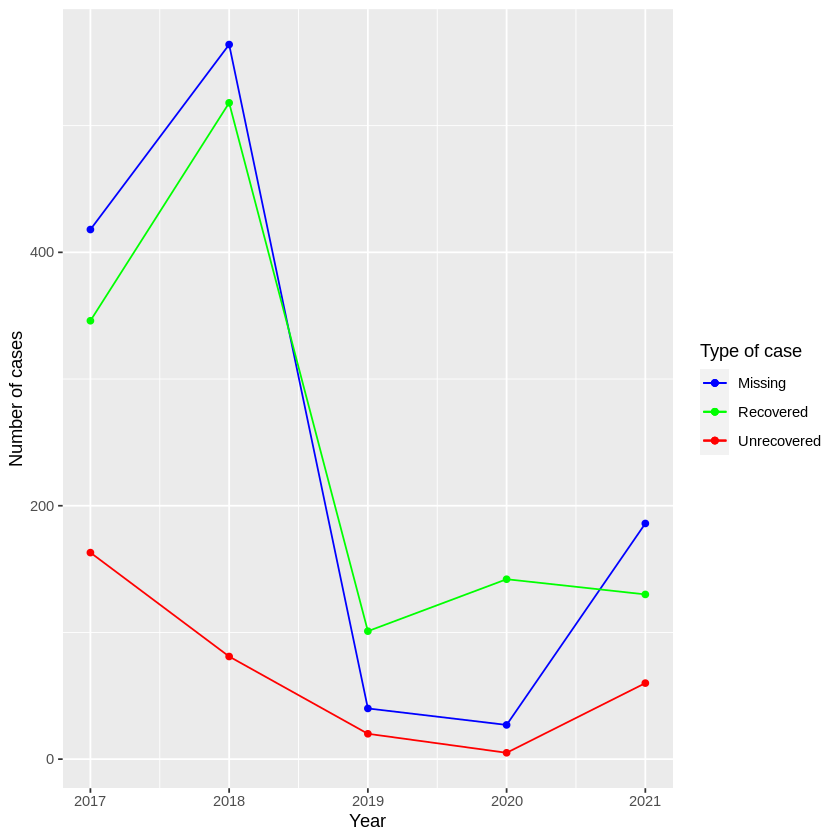

In [60]:
p<-ggplot(trans_grp_year, aes(x=Year)) +
  geom_line(aes(y=total_missing_trans,color="blue"))+
  geom_point(aes(y=total_missing_trans,color="blue")) +
  geom_line(aes(y=total_recovered_trans,color="green")) +
  geom_point(aes(y=total_recovered_trans,color="green")) +
  geom_line(aes(y=total_unrecovered_trans,color="red")) +
  geom_point(aes(y=total_unrecovered_trans,color="red")) +
  labs(x="Year",y="Number of cases") +
  scale_y_continuous(labels = function(x) format(x, scientific=FALSE)) +
  scale_color_manual(labels = c("Missing", "Recovered","Unrecovered"), values = c("blue","green","red"),name="Type of case")
p

### State-wise

In [61]:
trans_state <- subset(df,select=c("Persons.Missing.this.year...Trans","State.UT"))
trans_state

,Persons.Missing.this.year...Trans,State.UT
,<int>,<chr>
1,7,Andhra Pradesh
2,0,Arunachal Pradesh
3,0,Assam
4,146,Bihar
5,0,Chhattisgarh
6,0,Goa
7,1,Gujarat
8,0,Haryana
9,0,Himachal Pradesh


In [62]:
trans_grp_state = trans_state %>% group_by(State.UT)  %>%
                    summarise(total_missing_trans = sum(Persons.Missing.this.year...Trans),
                              .groups = 'drop')
trans_grp_state

State.UT,total_missing_trans
<chr>,<int>
A & N Islands,0
Andhra Pradesh,514
Arunachal Pradesh,0
Assam,20
Bihar,221
Chandigarh,1
Chhattisgarh,0
D&N Haveli,0
D&N Haveli and Daman and Diu,0


In [63]:
trans_grp_state <-trans_grp_state[-c(8,9,10),]

In [64]:
trans_grp_state[nrow(trans_grp_state)+1,] <- list("D&N Haveli and Daman and Diu",0)

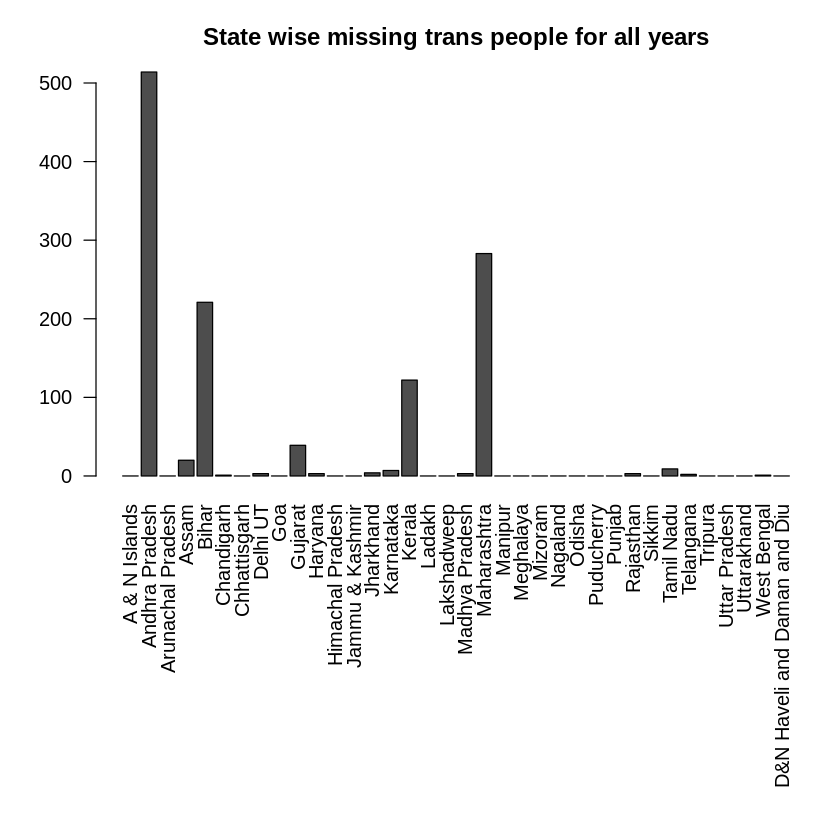

In [65]:
state <- c("A & N Islands","Andhra Pradesh","Arunachal Pradesh","Assam","Bihar","Chandigarh","Chhattisgarh","Delhi UT","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu & Kashmir","Jharkhand","Karnataka","Kerala","Ladakh","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Puducherry","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","D&N Haveli and Daman and Diu")


mx <- t(as.matrix(trans_grp_state[-1]))
colnames(mx) <- trans_grp_state$State.UT

# Create the bar chart
par(mar=c(15, 4,3,1)) # 15 line height for bottom margin
#dev.new(width=500,height=500,unit="px")
barplot(mx, main = "State wise missing trans people for all years", names.arg=state,las=2)   


In [66]:
trans_grp_state2 <- subset(trans_grp_state,select=c("State.UT","total_missing_trans"),total_missing_trans!=0)
trans_grp_state2

State.UT,total_missing_trans
<chr>,<int>
Andhra Pradesh,514
Assam,20
Bihar,221
Chandigarh,1
Delhi UT,3
Gujarat,39
Haryana,3
Jharkhand,4
Karnataka,7


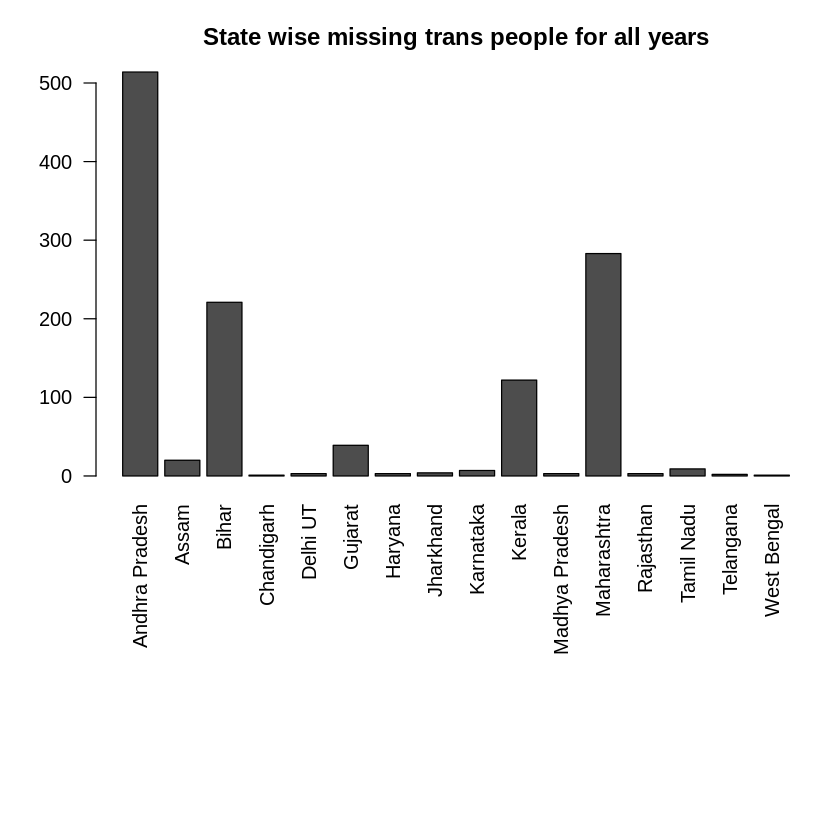

In [67]:
state <- c("Andhra Pradesh","Assam","Bihar","Chandigarh","Delhi UT","Gujarat","Haryana","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Rajasthan","Tamil Nadu","Telangana","West Bengal")


mx <- t(as.matrix(trans_grp_state2[-1]))
colnames(mx) <- trans_grp_state2$State.UT

# Create the bar chart
par(mar=c(15, 4,3,1)) # 15 line height for bottom margin
#dev.new(width=500,height=500,unit="px")
barplot(mx, main = "State wise missing trans people for all years", names.arg=state,las=2)   

In [71]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

ERROR: ignored

In [ ]:
!sudo apt update && sudo apt upgrade
!sudo apt install inkscape pandoc texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --to pdf '/content/gdrive/MyDrive/Colab Notebooks/DM2_boston_housing.ipynb'